1) implement a simple quantum operation with Pennylane
a) With 5 qubits 
b) Apply Hadamard operation on every qubit 
c) Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) 
d) SWAP (0, 4) 
e) Rotate X with pi/2 on any qubit 
f) Plot the circuit 

In [1]:
#install packages for the notebook
%pip install pennylane matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.0 MB 791 kB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 58.3 MB/s eta 0:00:01
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
     |████████████████████████████████| 52 kB 5.6 MB/s  eta 0:00:01
     |████████████████████████████████| 930 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 27.9 MB/s eta 0:00:01
  Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
     |████████████████████████████████| 1.9 MB 21.9 MB/s eta 0:00:01     |██████████████████              | 1.1 MB 21.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 28.4 MB/s eta 0:00:01
  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)
     |████████████████████████████████| 1.6 MB 12.1 MB/s eta 0:00:01
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
  Using 

/Users/cassie/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/61/z36hrmy516l8jpg81wnm8pr00000gn/T/ipykernel_13840/1355788219.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


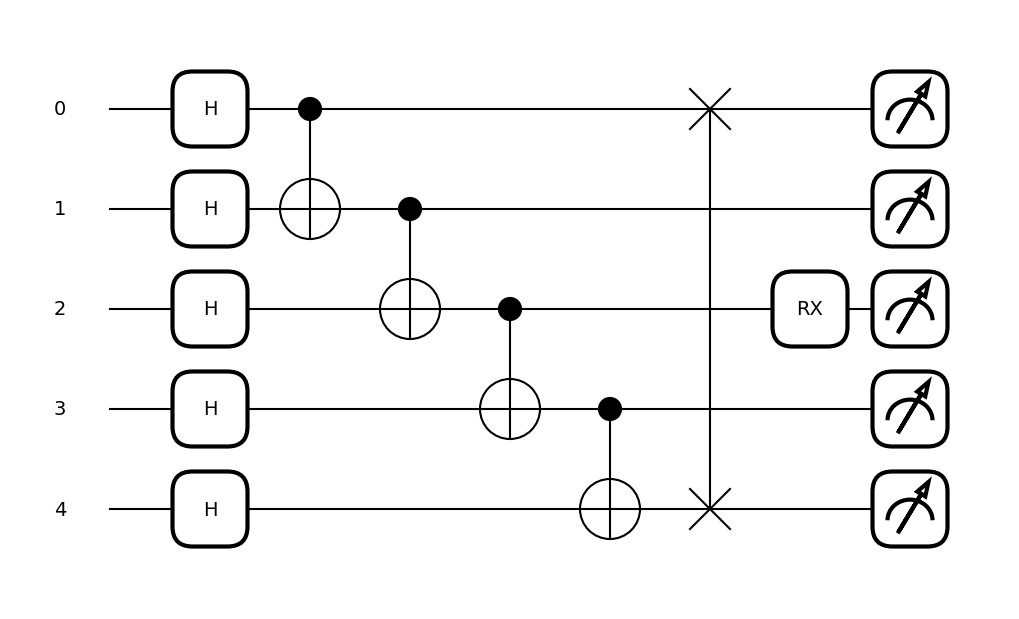

First few amplitudes of the final state:
[0.125-0.125j 0.125-0.125j 0.125-0.125j 0.125-0.125j 0.125-0.125j
 0.125-0.125j 0.125-0.125j 0.125-0.125j]


In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Set up a device with 5 qubits
dev = qml.device("default.qubit", wires=5)

@qml.qnode(dev)
def quantum_circuit():
    # b) Apply Hadamard operation on every qubit
    for i in range(5):
        qml.Hadamard(wires=i)
    
    # c) Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 4])
    
    # d) SWAP (0, 4)
    qml.SWAP(wires=[0, 4])
    
    # e) Rotate X with pi/2 on qubit 2
    qml.RX(np.pi/2, wires=2)
    
    # Return state for measurement
    return qml.state()

# Execute the circuit
state = quantum_circuit()

# f) Plot the circuit
fig, ax = qml.draw_mpl(quantum_circuit)()
plt.tight_layout()
plt.show()

# Print the final state (first few amplitudes)
print("First few amplitudes of the final state:")
print(state[:8])

2) Implement a second circuit with a framework of your choice(pennylane was my choice):
Apply a Hadmard gate to the first qubit
rotate the second qubit by pi/3 around X
Apply Hadamard gate to the third and fourth qubit
Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>

Running swap test circuit:


/var/folders/61/z36hrmy516l8jpg81wnm8pr00000gn/T/ipykernel_13840/2288230490.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


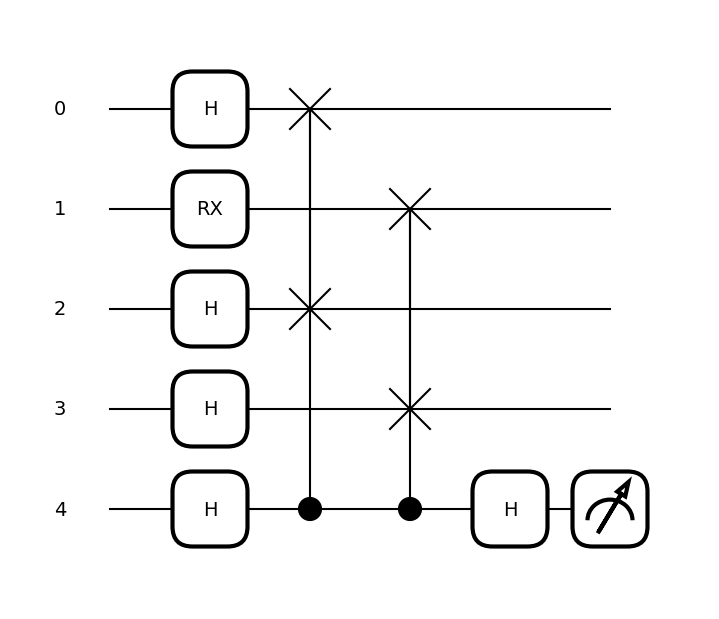

Swap test result probabilities:
Probability of measuring |0>: 0.750000
Probability of measuring |1>: 0.250000
Estimated state fidelity: 0.500000

Visualization of the first state preparation (q0, q1):


/var/folders/61/z36hrmy516l8jpg81wnm8pr00000gn/T/ipykernel_13840/2288230490.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


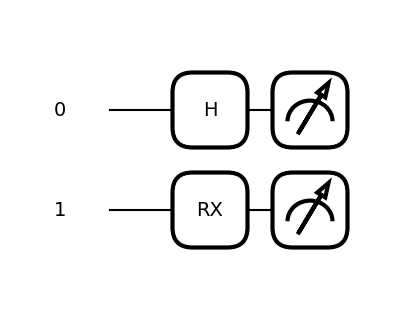


Visualization of the second state preparation (q2, q3):


/var/folders/61/z36hrmy516l8jpg81wnm8pr00000gn/T/ipykernel_13840/2288230490.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


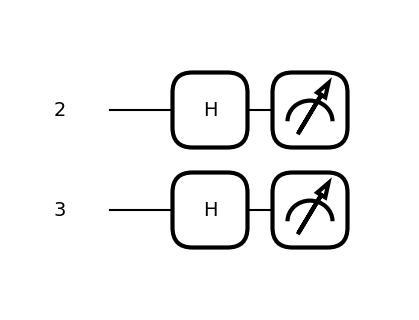

In [3]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Set up a device with 5 qubits
dev = qml.device("default.qubit", wires=5)

@qml.qnode(dev)
def swap_test_circuit():
    # Create the first state |q1 q2>
    qml.Hadamard(wires=0)     # Apply Hadamard to first qubit
    qml.RX(np.pi/3, wires=1)  # Rotate second qubit by pi/3 around X
    
    # Create the second state |q3 q4>
    qml.Hadamard(wires=2)     # Apply Hadamard to third qubit
    qml.Hadamard(wires=3)     # Apply Hadamard to fourth qubit
    
    # Swap test using qubit 4 as ancilla

    # Apply Hadamard to the ancilla qubit
    qml.Hadamard(wires=4)
    
    # Apply controlled-SWAP operations (Fredkin gates)
    # swap qubits 0,1 with qubits 2,3, controlled by qubit 4
    qml.ctrl(qml.SWAP, control=4)(wires=[0, 2])
    qml.ctrl(qml.SWAP, control=4)(wires=[1, 3])
    
    # Apply another Hadamard to the ancilla qubit
    qml.Hadamard(wires=4)
    
    # Measure the ancilla qubit in the computational basis
    return qml.probs(wires=4)

def run_and_analyze():
    # Execute the circuit
    probabilities = swap_test_circuit()
    
    # Plot the circuit
    fig, ax = qml.draw_mpl(swap_test_circuit)()
    plt.tight_layout()
    plt.show()
    
    # Print the probabilities
    print("Swap test result probabilities:")
    print(f"Probability of measuring |0>: {probabilities[0]:.6f}")
    print(f"Probability of measuring |1>: {probabilities[1]:.6f}")
    
    fidelity = 2 * probabilities[0] - 1
    print(f"Estimated state fidelity: {fidelity:.6f}")
    
    return probabilities, fidelity

#visualize the individual states
@qml.qnode(dev)
def prepare_first_state():
    qml.Hadamard(wires=0)
    qml.RX(np.pi/3, wires=1)
    return qml.state()

@qml.qnode(dev)
def prepare_second_state():
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)
    return qml.state()

# Run the main swap test
print("Running swap test circuit:")
probabilities, fidelity = run_and_analyze()

# Visualize the first state preparation
print("\nVisualization of the first state preparation (q0, q1):")
fig1, ax1 = qml.draw_mpl(prepare_first_state)()
plt.tight_layout()
plt.show()

# Visualize the second state preparation
print("\nVisualization of the second state preparation (q2, q3):")
fig2, ax2 = qml.draw_mpl(prepare_second_state)()
plt.tight_layout()
plt.show()
